##Importing Libraries and Dataset


In [774]:
import seaborn as sns
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import make_scorer, accuracy_score,auc
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandas import get_dummies
import matplotlib as mpl
from scipy import stats
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib
import warnings
import sklearn

In [775]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [776]:
#Loading train file into df
df_train = pd.read_csv('train.csv')


In [777]:
#Loading train file into df
df_test = pd.read_csv('test.csv')

In [778]:
df_test.columns

Index(['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee'],
      dtype='object')

In [779]:
df_train.columns

Index(['UserID', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [780]:
df_train.rename(columns = {'realtionship_status':'relationship_status'}, inplace = True)

In [781]:
df_test.rename(columns = {'realtionship_status':'relationship_status'}, inplace = True)

In [782]:
#df_train['relationship_status']=df_train['realtionship_status']

In [783]:
#df_train=df_train.drop(['realtionship_status'], axis=1)


In [784]:
df_train.columns

Index(['UserID', 'relationship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

##Gaining basic Insights from the data and Data Cleansing

In [785]:
#Reading the top 5 rows of the dataset
df_train.head(5)

,UserID,relationship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [786]:
#Reading bottom 5 rows of the dataset
df_train.tail()

,UserID,relationship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
19531,UI_13124,Never-married,Auto,Infomercial,Male,40,Primetime,United-States,0.027465,High,Yes,0
19532,UI_19649,Never-married,Political,Drama,Female,15,Morning,United-States,0.027465,High,Yes,1
19533,UI_9846,Married-civ-spouse,Other,Comedy,Female,55,Primetime,United-States,0.027465,Low,Yes,0
19534,UI_10800,Never-married,Political,Comedy,Male,38,Primetime,United-States,0.027465,High,Yes,0
19535,UI_2733,Never-married,Political,Infomercial,Male,40,Morning,United-States,0.027465,High,Yes,0


In [787]:
#Checking the dimensions of the dataset
df_train.shape

(19536, 12)

In [788]:
#Checking the dimensions of the test dataset
df_test.shape

(6512, 11)

In [789]:
#Checking datatypes
df_train.dtypes

UserID                                object
relationship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
netgain                                int64
dtype: object

3 Numerical and 9 String 

In [790]:
df_test.dtypes

UserID                                object
relationship_status                   object
industry                              object
genre                                 object
targeted_sex                          object
average_runtime(minutes_per_week)      int64
airtime                               object
airlocation                           object
ratings                              float64
expensive                             object
money_back_guarantee                  object
dtype: object

2 Numerical and 9 String


In [791]:
#checking the Info
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19536 entries, 0 to 19535
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             19536 non-null  object 
 1   relationship_status                19536 non-null  object 
 2   industry                           19536 non-null  object 
 3   genre                              19536 non-null  object 
 4   targeted_sex                       19536 non-null  object 
 5   average_runtime(minutes_per_week)  19536 non-null  int64  
 6   airtime                            19536 non-null  object 
 7   airlocation                        19536 non-null  object 
 8   ratings                            19536 non-null  float64
 9   expensive                          19536 non-null  object 
 10  money_back_guarantee               19536 non-null  object 
 11  netgain                            19536 non-null  int

In [792]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6512 entries, 0 to 6511
Data columns (total 11 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   UserID                             6512 non-null   object 
 1   relationship_status                6512 non-null   object 
 2   industry                           6512 non-null   object 
 3   genre                              6512 non-null   object 
 4   targeted_sex                       6512 non-null   object 
 5   average_runtime(minutes_per_week)  6512 non-null   int64  
 6   airtime                            6512 non-null   object 
 7   airlocation                        6512 non-null   object 
 8   ratings                            6512 non-null   float64
 9   expensive                          6512 non-null   object 
 10  money_back_guarantee               6512 non-null   object 
dtypes: float64(1), int64(1), object(9)
memory usage: 559.8+ 

In [793]:
#checking for null values
print(df_train.isnull().sum())

UserID                               0
relationship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64


No Null Values present in the Dataset
--df.dropna(inplace=True)





In [794]:
#checking for null values
print(df_test.isnull().sum())

UserID                               0
relationship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
dtype: int64


In [795]:
#Ananlysing basic statistical details
df_train.describe()


,average_runtime(minutes_per_week),ratings,netgain
count,19536.000000,19536.000000,19536.000000
mean,40.375665,0.038826,0.238022
std,12.483166,0.075971,0.425884
min,1.000000,0.000000,0.000000
25%,40.000000,0.027465,0.000000
50%,40.000000,0.027465,0.000000
75%,45.000000,0.027465,0.000000
max,99.000000,1.000000,1.000000


In [796]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
average_runtime(minutes_per_week),19536.0,40.375665,12.483166,1.0,40.000000,40.000000,45.000000,99.0
ratings,19536.0,0.038826,0.075971,0.0,0.027465,0.027465,0.027465,1.0
netgain,19536.0,0.238022,0.425884,0.0,0.000000,0.000000,0.000000,1.0


In [797]:
#Ananlysing basic statistical details
df_train.describe(include= object)

,UserID,relationship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee
count,19536,19536,19536,19536,19536,19536,19536,19536,19536
unique,19536,7,6,5,2,3,42,3,2
top,UI_17751,Married-civ-spouse,Pharma,Comedy,Male,Primetime,United-States,Low,Yes
freq,1,8899,7735,16699,12869,11755,17434,11756,9788


In [798]:
df_test.describe(include= object)

,UserID,relationship_status,industry,genre,targeted_sex,airtime,airlocation,expensive,money_back_guarantee
count,6512,6512,6512,6512,6512,6512,6512,6512,6512
unique,6512,7,6,5,2,3,41,3,2
top,UI_18319,Married-civ-spouse,Pharma,Comedy,Male,Primetime,United-States,Low,Yes
freq,1,2945,2604,5559,4376,3897,5816,3937,3285


In [799]:
#total data present
print('total train data: ' + str(df_train.shape[0]))
print('total test data: ' + str(df_test.shape[0]))

total train data: 19536
total test data: 6512


In [800]:
df_train["netgain"].value_counts()

0    14886
1     4650
Name: netgain, dtype: int64

In [801]:
df_train.airlocation.value_counts()

United-States                 17434
Mexico                          394
International                   355
Philippines                     112
Germany                          75
Cuba                             68
Puerto-Rico                      65
Canada                           65
El-Salvador                      64
India                            62
England                          56
Italy                            52
Guatemala                        50
South                            48
Poland                           47
Dominican-Republic               47
Jamaica                          46
Vietnam                          45
Columbia                         42
Japan                            38
China                            36
Iran                             31
Taiwan                           29
Haiti                            26
Ecuador                          25
Nicaragua                        23
Portugal                         22
Peru                        

In [802]:
df_test.airlocation.value_counts()

United-States                 5816
Mexico                         129
International                  110
Germany                         39
Philippines                     29
Canada                          29
England                         23
South                           21
El-Salvador                     20
Puerto-Rico                     20
Poland                          19
India                           19
Cuba                            18
Italy                           18
China                           17
Jamaica                         17
Japan                           16
Dominican-Republic              15
Columbia                        13
Vietnam                         12
Guatemala                       11
Haiti                            9
Taiwan                           8
Portugal                         8
Ireland                          8
France                           7
Peru                             7
Honduras                         6
Ecuador             

## Basic Exploratory Data Analysis

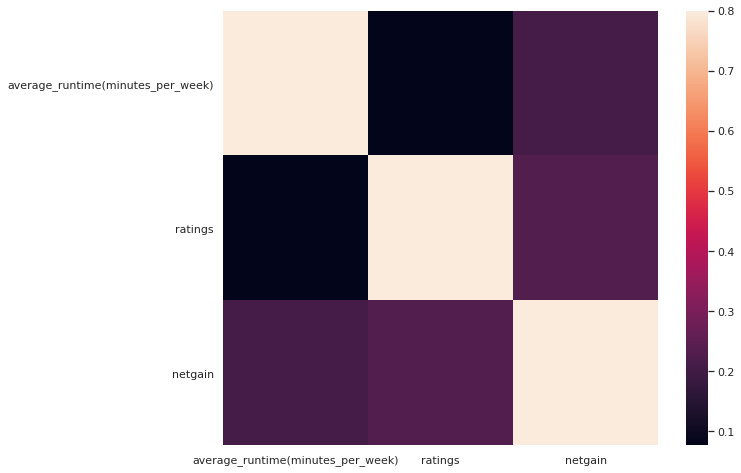

In [803]:
#correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corrmat, vmax=.8, square=True);

Correlation

When two sets of data are strongly linked together we say they have a High Correlation.

The word Correlation is made of Co- (meaning "together"), and Relation

Correlation is Positive when the values increase together, and Correlation is Negative when one value decreases as the other increases A correlation is assumed to be linear (following a line).

correlation examples Correlation can have a value:

1 is a perfect positive correlation 0 is no correlation (the values don't seem linked at all) -1 is a perfect negative correlation The value shows how good the correlation is (not how steep the line is), and if it is positive or negative.

In [804]:
# method to add percentage on the plot
def add_percentage(ax, total):
    for i in ax.patches:
        height = i.get_height()
        ax.text(i.get_x()+i.get_width()/2.,height + 5,'{:1.2f}'.format(height/total*100) + '%')

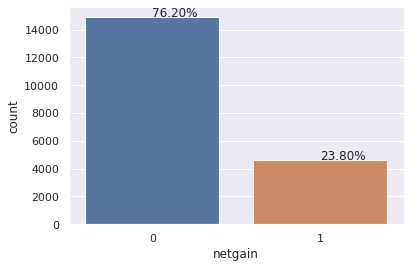

In [805]:
sns.set()
total = float(len(df_train))
ax = sns.countplot(df_train.netgain)

add_percentage(ax, total)

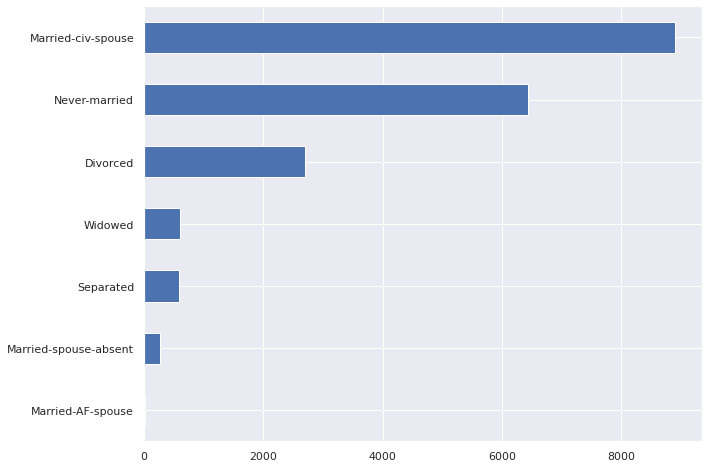

In [806]:
df_train.relationship_status.value_counts(ascending=True).plot.barh(figsize=(10,8))


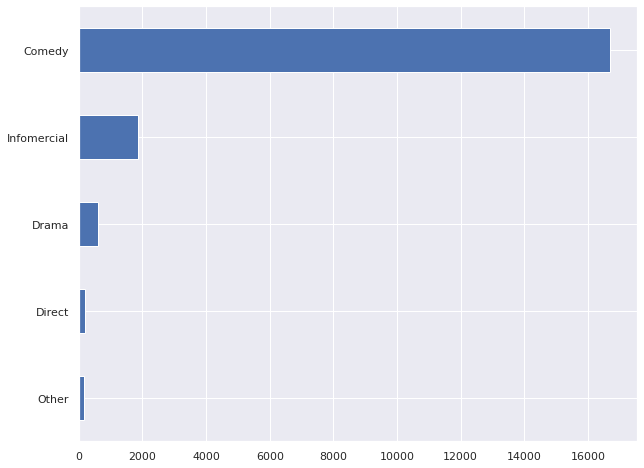

In [807]:
df_train.genre.value_counts(ascending=True).plot.barh(figsize=(10,8))

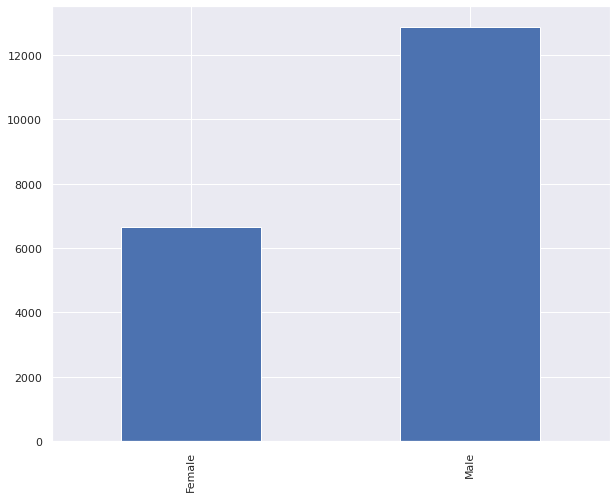

In [808]:
df_train.targeted_sex.value_counts(ascending=True).plot.bar(figsize=(10,8))

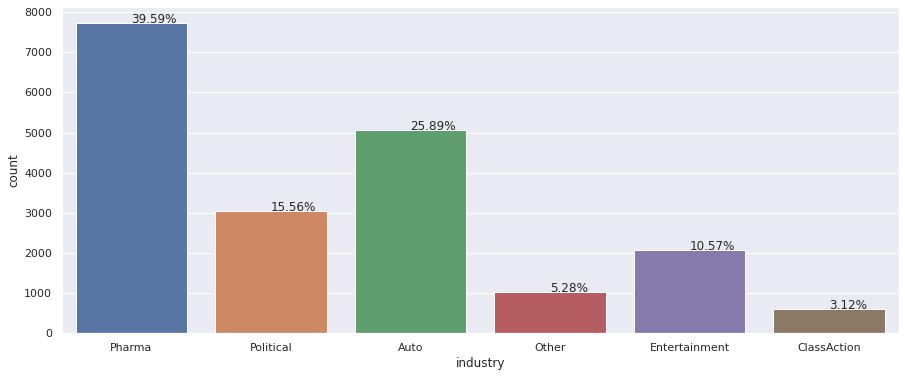

In [809]:
plt.figure(figsize=(15,6))
total = float(len(df_train))
ax= sns.countplot(df_train.industry)
add_percentage(ax, total)

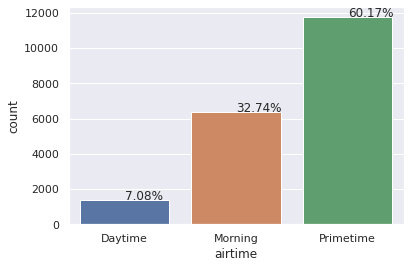

In [810]:
total = float(len(df_train))
ax= sns.countplot(df_train.airtime)
add_percentage(ax, total)

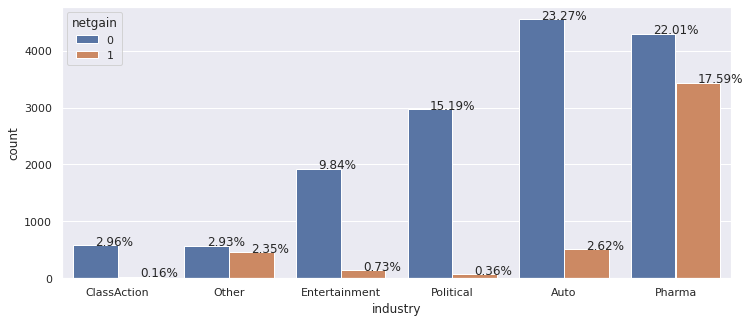

In [811]:
plt.figure(figsize=(12,5))
ax= sns.countplot(x='industry',hue='netgain',data=df_train,order=df_train['industry'].value_counts().sort_values().index);
add_percentage(ax, total)

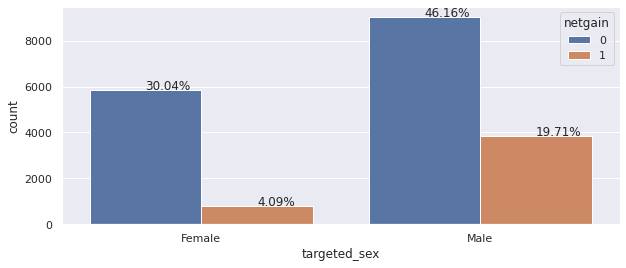

In [812]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='targeted_sex',data=df_train,order=df_train['targeted_sex'].value_counts().sort_values().index,hue=df_train.netgain);
add_percentage(ax, total)

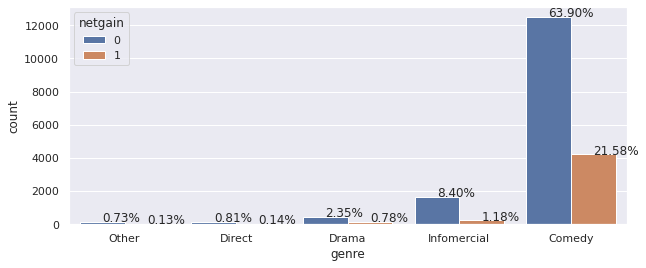

In [813]:
plt.figure(figsize=(10,4))
ax=sns.countplot(x='genre',hue='netgain',data=df_train,order=df_train['genre'].value_counts().sort_values().index);
add_percentage(ax, total)

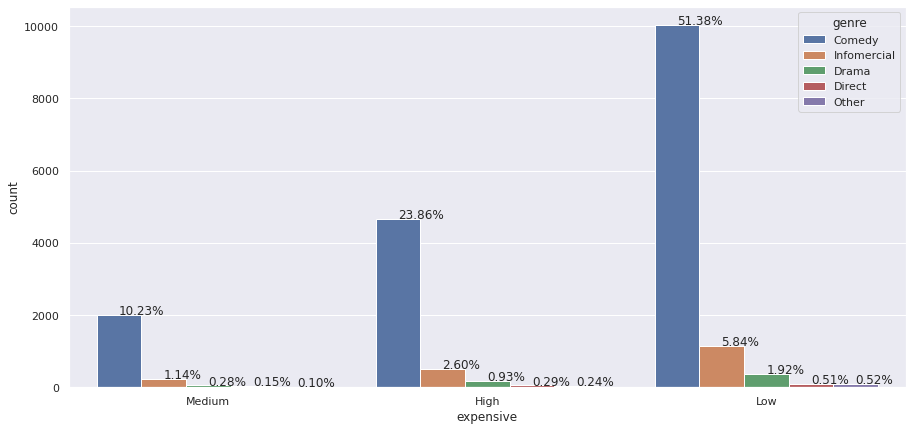

In [814]:
plt.figure(figsize=(15,7))
ax=sns.countplot(x='expensive',hue='genre',data=df_train,order=df_train['expensive'].value_counts().sort_values().index);
add_percentage(ax, total)

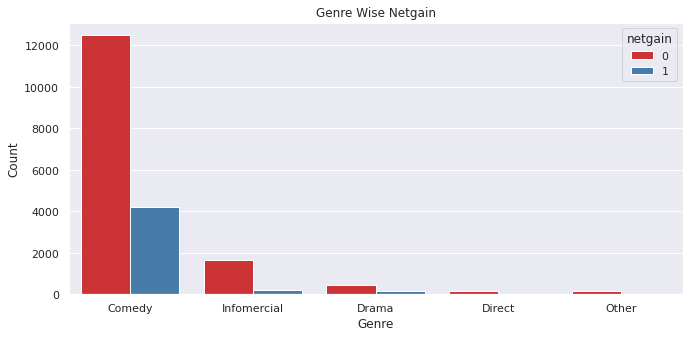

In [815]:
plt.figure(figsize=(11,5))
sns.countplot(x='genre',hue='netgain', data=df_train,palette="Set1")
plt.xlabel('Genre')
plt.ylabel('Count')
plt.title('Genre Wise Netgain')
plt.show()

In [816]:
print(df_train.relationship_status.value_counts())
print("")
print(df_train.industry.value_counts())

Married-civ-spouse       8899
Never-married            6433
Divorced                 2700
Widowed                   616
Separated                 598
Married-spouse-absent     274
Married-AF-spouse          16
Name: relationship_status, dtype: int64

Pharma           7735
Auto             5058
Political        3039
Entertainment    2064
Other            1031
ClassAction       609
Name: industry, dtype: int64


In [817]:
df_train.columns

Index(['UserID', 'relationship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [818]:
column= ['UserID', 'relationship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain']

In [819]:
for column in df_train.columns:
    print(column, '--> ',df_train[column].nunique())

UserID -->  19536
relationship_status -->  7
industry -->  6
genre -->  5
targeted_sex -->  2
average_runtime(minutes_per_week) -->  89
airtime -->  3
airlocation -->  42
ratings -->  120
expensive -->  3
money_back_guarantee -->  2
netgain -->  2


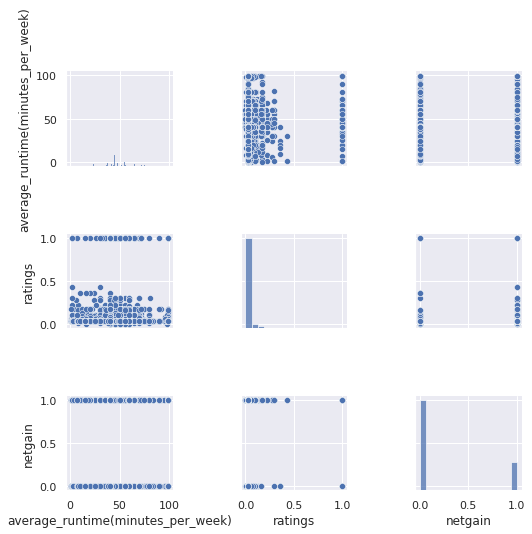

In [820]:
sns.set()
cols = ['relationship_status','industry','genre','targeted_sex','average_runtime(minutes_per_week)','airtime','airlocation','ratings','expensive','money_back_guarantee','netgain']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

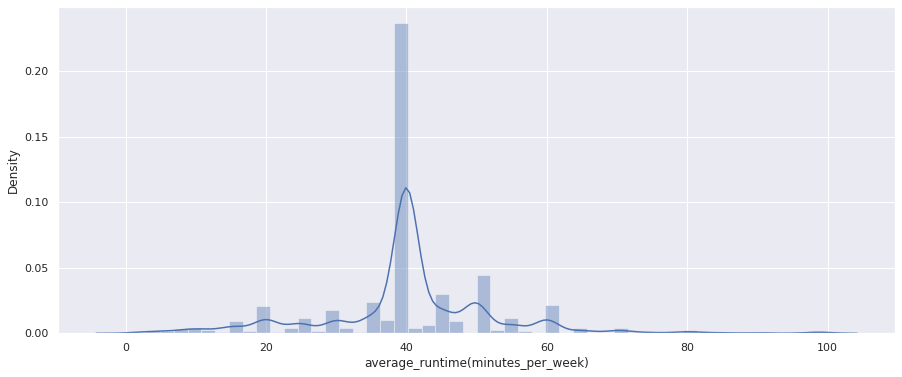

In [821]:
plt.figure(figsize=(15,6))
sns.distplot(df_train['average_runtime(minutes_per_week)'])
plt.show()

In [822]:
#df=pd.concat([df_train,df_test],ignore_index=True)

##Encoding Categorical Columns


In [823]:
df_train.head()

,UserID,relationship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,UI_9185,Married-civ-spouse,Pharma,Comedy,Male,40,Daytime,United-States,0.027465,Medium,No,0
1,UI_449,Never-married,Political,Comedy,Male,35,Morning,International,0.027465,Low,No,0
2,UI_9014,Never-married,Auto,Comedy,Male,40,Morning,United-States,0.027465,Low,No,0
3,UI_14987,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,0
4,UI_25532,Married-civ-spouse,Other,Comedy,Female,50,Primetime,United-States,0.027465,Low,Yes,1


In [824]:
df_train=pd.get_dummies(df_train,columns=['relationship_status','airlocation','industry','genre','targeted_sex','airtime','expensive','money_back_guarantee'])

In [825]:
df_train.head()

,UserID,average_runtime(minutes_per_week),ratings,netgain,relationship_status_Divorced,relationship_status_Married-AF-spouse,relationship_status_Married-civ-spouse,relationship_status_Married-spouse-absent,relationship_status_Never-married,relationship_status_Separated,relationship_status_Widowed,airlocation_Cambodia,airlocation_Canada,airlocation_China,airlocation_Columbia,airlocation_Cuba,airlocation_Dominican-Republic,airlocation_Ecuador,airlocation_El-Salvador,airlocation_England,airlocation_France,airlocation_Germany,airlocation_Greece,airlocation_Guatemala,airlocation_Haiti,airlocation_Holand-Netherlands,airlocation_Honduras,airlocation_Hong,airlocation_Hungary,airlocation_India,airlocation_International,airlocation_Iran,airlocation_Ireland,airlocation_Italy,airlocation_Jamaica,airlocation_Japan,airlocation_Laos,airlocation_Mexico,airlocation_Nicaragua,airlocation_Outlying-US(Guam-USVI-etc),airlocation_Peru,airlocation_Philippines,airlocation_Poland,airlocation_Portugal,airlocation_Puerto-Rico,airlocation_Scotland,airlocation_South,airlocation_Taiwan,airlocation_Thailand,airlocation_Trinadad&Tobago,airlocation_United-States,airlocation_Vietnam,airlocation_Yugoslavia,industry_Auto,industry_ClassAction,industry_Entertainment,industry_Other,industry_Pharma,industry_Political,genre_Comedy,genre_Direct,genre_Drama,genre_Infomercial,genre_Other,targeted_sex_Female,targeted_sex_Male,airtime_Daytime,airtime_Morning,airtime_Primetime,expensive_High,expensive_Low,expensive_Medium,money_back_guarantee_No,money_back_guarantee_Yes
0,UI_9185,40,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0
1,UI_449,35,0.027465,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0
2,UI_9014,40,0.027465,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,1,0
3,UI_14987,40,0.027465,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1
4,UI_25532,50,0.027465,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1


## Train Test Split

In [826]:
#features = ['relationship_status','industry','genre','targeted_sex','average_runtime(minutes_per_week)','airtime','airlocation','ratings','expensive','money_back_guarantee']
#Dropping Airlocation_trinadad&Tobago as it is not present in the test data and it is causing issue
X = df_train.drop(['UserID', 'airlocation_Trinadad&Tobago','netgain'],axis=1)
y = df_train['netgain']

In [827]:
X.head()
X.shape

(19536, 71)

In [828]:
X.columns

Index(['average_runtime(minutes_per_week)', 'ratings',
       'relationship_status_Divorced', 'relationship_status_Married-AF-spouse',
       'relationship_status_Married-civ-spouse',
       'relationship_status_Married-spouse-absent',
       'relationship_status_Never-married', 'relationship_status_Separated',
       'relationship_status_Widowed', 'airlocation_Cambodia',
       'airlocation_Canada', 'airlocation_China', 'airlocation_Columbia',
       'airlocation_Cuba', 'airlocation_Dominican-Republic',
       'airlocation_Ecuador', 'airlocation_El-Salvador', 'airlocation_England',
       'airlocation_France', 'airlocation_Germany', 'airlocation_Greece',
       'airlocation_Guatemala', 'airlocation_Haiti',
       'airlocation_Holand-Netherlands', 'airlocation_Honduras',
       'airlocation_Hong', 'airlocation_Hungary', 'airlocation_India',
       'airlocation_International', 'airlocation_Iran', 'airlocation_Ireland',
       'airlocation_Italy', 'airlocation_Jamaica', 'airlocation_Japa

In [829]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

##Logistics regression

Logistic regression is a statistical model that in its basic form uses a logistic function to model a binary dependent variable, although many more complex extensions exist. In regression analysis, logistic regression (or logit regression) is estimating the parameters of a logistic model (a form of binary regression). Mathematically, a binary logistic model has a dependent variable with two possible values, such as pass/fail which is represented by an indicator variable, where the two values are labeled "0" and "1". In the logistic model, the log-odds (the logarithm of the odds) for the value labeled "1" is a linear combination of one or more independent variables ("predictors"); the independent variables can each be a binary variable (two classes, coded by an indicator variable) or a continuous variable (any real value). The corresponding probability of the value labeled "1" can vary between 0 (certainly the value "0") and 1 (certainly the value "1")

In [830]:

log =LogisticRegression()
log.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [831]:
#model on train using all the independent values in df
log_prediction = log.predict(x_train)
log_score= accuracy_score(y_train,log_prediction)
print('Accuracy score on train set using Logistic Regression :',log_score)

Accuracy score on train set using Logistic Regression : 0.8015356489945156


In [832]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, log_prediction)

array([[9717,  697],
       [2017, 1244]])

In [833]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_train,log_prediction)
print("AUC on train using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on train using Logistic Regression : 0.6572744701760486


In [834]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_train, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.39


In [835]:
from sklearn.metrics import recall_score
print('recall_score on train set :',recall_score(y_train, log_prediction))

recall_score on train set : 0.3814780742103649


In [836]:
from sklearn.metrics import f1_score
print('F1_score on train set :',f1_score(y_train, log_prediction))

F1_score on train set : 0.47827758554402144


In [837]:
#model on train using all the independent values in df
log_prediction = log.predict(x_test)
log_score= accuracy_score(y_test,log_prediction)
print('accuracy score on test using Logisitic Regression :',log_score)

accuracy score on test using Logisitic Regression : 0.7998635045214127


In [838]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, log_prediction)

array([[4164,  308],
       [ 865,  524]])

In [839]:
from sklearn import metrics
fpr, tpr, thresholds = metrics.roc_curve(y_test,log_prediction)
print("AUC on test using Logistic Regression :",metrics.auc(fpr, tpr))

AUC on test using Logistic Regression : 0.6541884162683801


In [840]:
from sklearn.metrics import average_precision_score
average_precision = average_precision_score(y_test, log_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.39


In [841]:
from sklearn.metrics import recall_score
print('recall_score on train set :',recall_score(y_test, log_prediction))

recall_score on train set : 0.37724982001439883


In [842]:
from sklearn.metrics import f1_score
print('F1_score on train set :',f1_score(y_test, log_prediction))

F1_score on train set : 0.47185952273750564


In [843]:
from sklearn.model_selection import cross_val_score
lr = LogisticRegression()
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80847953 0.79532164 0.81578947 0.81140351 0.81067251 0.80395026
 0.7973665  0.79078274 0.79809802 0.80468178]
Mean: 0.8036545964398927
Standard Deviation: 0.0076584155894509395


##XGBoost Algorithm

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

In [844]:
xgboost = xgb.XGBClassifier(max_depth=3,n_estimators=300,learning_rate=0.05)

In [845]:
xgboost.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=300, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [846]:
#XGBoost model on the train set
XGB_prediction = xgboost.predict(x_train)
XGB_score= accuracy_score(y_train,XGB_prediction)
print('accuracy score on train using XGBoost ',XGB_score)

accuracy score on train using XGBoost  0.823254113345521


In [847]:
confusion_matrix(y_train, XGB_prediction)

array([[9758,  656],
       [1761, 1500]])

In [848]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,XGB_prediction)
print("AUC on train using XGBoost :",metrics.auc(fpr, tpr))

AUC on train using XGBoost : 0.6984947373758593


In [849]:
print('recall_score on train set :',recall_score(y_train, XGB_prediction))

recall_score on train set : 0.45998160073597055


In [850]:
print('F1_score on train set :',f1_score(y_train, XGB_prediction))

F1_score on train set : 0.5538120731031937


In [851]:
#XGBoost model on the test
XGB_prediction = xgboost.predict(x_test)
XGB_score= accuracy_score(y_test,XGB_prediction)
print('accuracy score on test using XGBoost :',XGB_score)

accuracy score on test using XGBoost : 0.8206790650059717


In [852]:
confusion_matrix(y_test, XGB_prediction)

array([[4176,  296],
       [ 755,  634]])

In [853]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,XGB_prediction)
print("AUC on test using XGBoost :",metrics.auc(fpr, tpr))

AUC on test using XGBoost : 0.6951269300960395


In [854]:
average_precision = average_precision_score(y_test, XGB_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.44


In [855]:
print('recall_score on test set :',recall_score(y_test, XGB_prediction))

recall_score on test set : 0.4564434845212383


In [856]:
print('F1_score on test set :',f1_score(y_test, XGB_prediction))

F1_score on test set : 0.5467874083656749


In [857]:
xg = xgb.XGBClassifier()
scores = cross_val_score(xg, x_test, y_test, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80408859 0.80887372 0.80887372 0.81740614 0.82764505 0.8225256
 0.80716724 0.82764505 0.81569966 0.81740614]
Mean: 0.8157330906849778
Standard Deviation: 0.007991228770290812


##DecisionTreeClassifer

In [858]:
dec=DecisionTreeClassifier()

In [859]:
dec.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [860]:
#model on train using all the independent values in df
dec_prediction = dec.predict(x_train)
dec_score= accuracy_score(y_train,dec_prediction)
print('Accuracy score on train using Decision Tree :',dec_score)

Accuracy score on train using Decision Tree : 0.8683729433272395


In [861]:
confusion_matrix(y_train, dec_prediction)

array([[9980,  434],
       [1366, 1895]])

In [862]:
    print(confusion_matrix(y_train, dec_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,dec_prediction)
    print("AUC on train using DecisionTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, dec_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, dec_prediction))
    print('F1_sccore on train set :',f1_score(y_train, dec_prediction))

[[9980  434]
 [1366 1895]]
AUC on train using DecisionTree : 0.7697177101072926
Average precision-recall score: 0.57
recall_score on train set : 0.5811100889297761
F1_sccore on train set : 0.6779964221824687


In [863]:
#model on test using all the independent values in df
dec_prediction = dec.predict(x_test)
dec_score= accuracy_score(y_test,dec_prediction)
print('Accuracy Score on tree using Decision Tree  :',dec_score)

Accuracy Score on tree using Decision Tree  : 0.7954274014673264


In [864]:
    print(confusion_matrix(y_test, dec_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,dec_prediction)
    print("AUC on train using DecisionTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, dec_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, dec_prediction))
    print('F1_sccore on test set :',f1_score(y_test, dec_prediction))

[[4068  404]
 [ 795  594]]
AUC on train using DecisionTree : 0.6686529478357296
Average precision-recall score: 0.39
recall_score on test set : 0.42764578833693306
F1_sccore on test set : 0.49769585253456217


In [865]:
lr = DecisionTreeClassifier()
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.80921053 0.79239766 0.79897661 0.79824561 0.79020468 0.78639356
 0.78346745 0.78200439 0.79005121 0.79224579]
Mean: 0.7923197487134075
Standard Deviation: 0.007708754378635227


##ExtraTree Classifier

Each Decision Tree in the Extra Trees Forest is constructed from the original training sample. Then, at each test node, Each tree is provided with a random sample of k features from the feature-set from which each decision tree must select the best feature to split the data based on some mathematical criteria (typically the Gini Index). This random sample of features leads to the creation of multiple de-correlated decision trees.

In [866]:
etc=ExtraTreeClassifier()
etc.fit(x_train,y_train)

ExtraTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [867]:
#model on train using all the independent values in df
etc_prediction = etc.predict(x_train)
etc_score= accuracy_score(y_train,etc_prediction)
etc_score

0.8683729433272395

In [868]:
    print(confusion_matrix(y_train, etc_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,etc_prediction)
    print("AUC on train using ExtraTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, etc_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, etc_prediction))
    print('F1_score on train set :',f1_score(y_train, etc_prediction))

[[9980  434]
 [1366 1895]]
AUC on train using ExtraTree : 0.7697177101072926
Average precision-recall score: 0.57
recall_score on train set : 0.5811100889297761
F1_score on train set : 0.6779964221824687


In [869]:
#model on test using all the independent values in df
etc_prediction = etc.predict(x_test)
etc_score= accuracy_score(y_test,etc_prediction)
etc_score

0.7850196212250469

In [870]:
    print(confusion_matrix(y_test, etc_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,etc_prediction)
    print("AUC on train using ExtraTree :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, etc_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, dec_prediction))
    print('F1_score on test set :',f1_score(y_test, etc_prediction))
   

[[4057  415]
 [ 845  544]]
AUC on train using ExtraTree : 0.6494245129441523
Average precision-recall score: 0.37
recall_score on test set : 0.42764578833693306
F1_score on test set : 0.4633730834752981


In [871]:
lr = ExtraTreeClassifier()
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.79312865 0.78362573 0.79605263 0.79532164 0.7755848  0.7849305
 0.78200439 0.77542063 0.78639356 0.78785662]
Mean: 0.7860319156217782
Standard Deviation: 0.006967806313624936


##RandomForestClassifier

In [872]:
rfc2=RandomForestClassifier(n_estimators=300)
rfc2.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [873]:
#model on train using all the independent values in df
rfc_prediction = rfc2.predict(x_train)
rfc_score= accuracy_score(y_train,rfc_prediction)
print('accuracy Score on train using RandomForest :',rfc_score)

accuracy Score on train using RandomForest : 0.8683729433272395


In [874]:
confusion_matrix(y_train, rfc_prediction)

array([[9868,  546],
       [1254, 2007]])

In [875]:
fpr, tpr, thresholds = metrics.roc_curve(y_train,rfc_prediction)
print("AUC on train using RandomForest :",metrics.auc(fpr, tpr))

AUC on train using RandomForest : 0.7815129799263569


In [876]:
average_precision = average_precision_score(y_train, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.58


In [877]:
print('recall_score on train set :',recall_score(y_train, rfc_prediction))

recall_score on train set : 0.6154553817847286


In [878]:
print('F1_score on train set :',f1_score(y_train, rfc_prediction))

F1_score on train set : 0.6904024767801857


In [879]:
#model on test using all the indpendent values in df
rfc_prediction = rfc2.predict(x_test)
rfc_score= accuracy_score(y_test,rfc_prediction)
print('accuracy score on test using RandomForest ',rfc_score)

accuracy score on test using RandomForest  0.7971335949496673


In [880]:
confusion_matrix(y_test, rfc_prediction)

array([[4061,  411],
       [ 778,  611]])

In [881]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,rfc_prediction)
print("AUC on test using RandomForest :",metrics.auc(fpr, tpr))

AUC on test using RandomForest : 0.6739898106899211


In [882]:
average_precision = average_precision_score(y_test, rfc_prediction)

print('Average precision-recall score: {0:0.2f}'.format(
      average_precision))

Average precision-recall score: 0.40


In [883]:
print('recall_score on test set :',recall_score(y_test, rfc_prediction))

recall_score on test set : 0.4398848092152628


In [884]:
print('F1_score on test set :',f1_score(y_test, rfc_prediction))

F1_score on test set : 0.5068436333471589


In [885]:
lr = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81140351 0.79751462 0.80555556 0.80409357 0.79385965 0.79517191
 0.79224579 0.78566203 0.79809802 0.80395026]
Mean: 0.7987554918141488
Standard Deviation: 0.007171415522331633


##ExtraTrees Classifier

Extremely Randomized Trees Classifier(Extra Trees Classifier) is a type of ensemble learning technique which aggregates the results of multiple de-correlated decision trees collected in a “forest” to output it’s classification result. In concept, it is very similar to a Random Forest Classifier and only differs from it in the manner of construction of the decision trees in the forest.

In [886]:
ettc=ExtraTreesClassifier()
ettc.fit(x_train,y_train)
#model on train using all the independent values in df
ettc_prediction = ettc.predict(x_train)
ettc_score= accuracy_score(y_train,ettc_prediction)
print('training accuracy using Extratressclassifier',ettc_score)

training accuracy using Extratressclassifier 0.8683729433272395


In [887]:
print(confusion_matrix(y_train, ettc_prediction))
fpr, tpr, thresholds = metrics.roc_curve(y_train,ettc_prediction)
print("AUC on train using ExtraTree :",metrics.auc(fpr, tpr))
average_precision = average_precision_score(y_train, ettc_prediction)
print('Average precision-recall score: {0:0.2f}'.format(average_precision))
print('recall_score on train set :',recall_score(y_train, ettc_prediction))
print('F1_sccore on train set :',f1_score(y_train, ettc_prediction))

[[9980  434]
 [1366 1895]]
AUC on train using ExtraTree : 0.7697177101072926
Average precision-recall score: 0.57
recall_score on train set : 0.5811100889297761
F1_sccore on train set : 0.6779964221824687


In [888]:
#model on test using all the independent values in df
ettc_prediction =ettc.predict(x_test)
ettc_score= accuracy_score(y_test,ettc_prediction)
print('testing accuracy using Extratressclassifier',ettc_score)

testing accuracy using Extratressclassifier 0.7915031564579423


In [889]:
    print(confusion_matrix(y_test, ettc_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,ettc_prediction)
    print("AUC on test using Extratreesclassifier :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, ettc_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, ettc_prediction))
    print('F1_score on test set :',f1_score(y_test, ettc_prediction))

[[4086  386]
 [ 836  553]]
AUC on test using Extratreesclassifier : 0.6559066509026326
Average precision-recall score: 0.38
recall_score on test set : 0.39812814974802013
F1_score on test set : 0.47508591065292094


##AdaBoostClassifier

An AdaBoost classifier is a meta-estimator that begins by fitting a classifier on the original dataset and then fits additional copies of the classifier on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent classifiers focus more on difficult cases.

In [890]:
ada =AdaBoostClassifier(n_estimators=100)

In [891]:
ada.fit(x_train,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=100, random_state=None)

In [892]:
#model on train using all the independent values in df
ada_prediction = ada.predict(x_train)
ada_score= accuracy_score(y_train,ada_prediction)
ada_score

0.81981718464351

In [893]:
    print(confusion_matrix(y_train, ada_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,ada_prediction)
    print("AUC on train using AdaBoost :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, ada_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, ada_prediction))
    print('F1_sccore on train set :',f1_score(y_train, ada_prediction))

[[9623  791]
 [1673 1588]]
AUC on train using AdaBoost : 0.7055058716926658
Average precision-recall score: 0.45
recall_score on train set : 0.4869671879791475
F1_sccore on train set : 0.5631205673758866


In [894]:
#model on test using all the independent values in df
ada_prediction = ada.predict(x_test)
ada_score= accuracy_score(y_test,ada_prediction)
print('accuracy score om test using AdaBoost :',ada_score)

accuracy score om test using AdaBoost : 0.8196553489165671


In [895]:
    print(confusion_matrix(y_test, ada_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,ada_prediction)
    print("AUC on test using AdaBoost :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, ada_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, ada_prediction))
    print('F1_sccore on test set :',f1_score(y_test, ada_prediction))

[[4134  338]
 [ 719  670]]
AUC on test using AdaBoost : 0.703390007869138
Average precision-recall score: 0.44
recall_score on test set : 0.48236141108711306
F1_sccore on test set : 0.5590321234876929


In [896]:
lr = AdaBoostClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.83333333 0.8128655  0.81871345 0.82821637 0.81432749 0.81858083
 0.80102414 0.8024872  0.81492319 0.81419166]
Mean: 0.8158663163028272
Standard Deviation: 0.009420473737247314


##Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by voting or by averaging) to form a final prediction. Such a meta-estimator can typically be used as a way to reduce the variance of a black-box estimator (e.g., a decision tree), by introducing randomization into its construction procedure and then making an ensemble out of it.

In [897]:
bca =BaggingClassifier()
bca.fit(x_train,y_train)
#model on train using all the independent values in df
bca_prediction = bca.predict(x_train)
bca_score= accuracy_score(y_train,bca_prediction)
print('accuracy on train using BaggingClassifier :',bca_score)

accuracy on train using BaggingClassifier : 0.8636928702010969


In [898]:
    print(confusion_matrix(y_train, bca_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_train,bca_prediction)
    print("AUC on train using BaggingClassifier :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_train, bca_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on train set :',recall_score(y_train, bca_prediction))
    print('F1_score on train set :',f1_score(y_train, bca_prediction))

[[9703  711]
 [1153 2108]]
AUC on train using BaggingClassifier : 0.7890769991119567
Average precision-recall score: 0.57
recall_score on train set : 0.646427476234284
F1_score on train set : 0.6934210526315789


In [899]:
#model on test using all the independent values in df
bca_prediction = bca.predict(x_test)
bca_score= accuracy_score(y_test,bca_prediction)
print(bca_score)

0.7933799692885173


In [900]:
    print(confusion_matrix(y_test, bca_prediction))
    fpr, tpr, thresholds = metrics.roc_curve(y_test,bca_prediction)
    print("AUC on train using Bagging Classifier :",metrics.auc(fpr, tpr))
    average_precision = average_precision_score(y_test, bca_prediction)
    print('Average precision-recall score: {0:0.2f}'.format(average_precision))
    print('recall_score on test set :',recall_score(y_test, bca_prediction))
    print('F1_score on test set :',f1_score(y_test, bca_prediction))

[[3986  486]
 [ 725  664]]
AUC on train using Bagging Classifier : 0.6846827745730253
Average precision-recall score: 0.40
recall_score on test set : 0.47804175665946724
F1_score on test set : 0.5230405671524222


In [901]:
lr = BaggingClassifier(n_estimators=100)
scores = cross_val_score(lr, x_train, y_train, cv=10, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.81871345 0.79897661 0.80628655 0.80628655 0.79239766 0.79663497
 0.78858815 0.79297732 0.80175567 0.80468178]
Mean: 0.8007298711910231
Standard Deviation: 0.008358371108504075


##Feature Selection


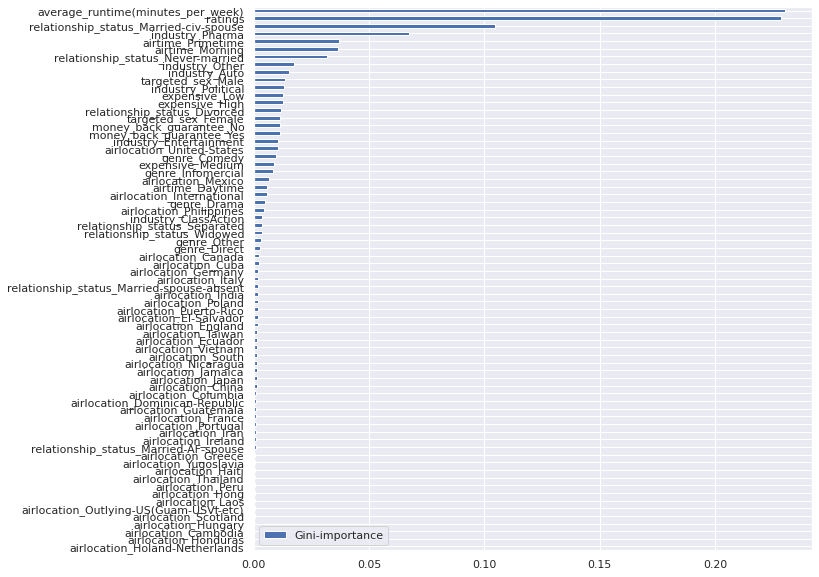

In [902]:
import pandas as pd
%matplotlib inline
#do code to support model
#"data" is the X dataframe and model is the SKlearn object

feats = {} # a dict to hold feature_name: feature_importance
for feature, importance in zip(x_train.columns, rfc2.feature_importances_):
    feats[feature] = importance #add the name/value pair 

importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Gini-importance'})
#plt.figure(figsize=(15,7))
importances.sort_values(by='Gini-importance').plot(kind='barh',figsize=(10,10))

##Model Selection

From the above we get to know that XGBoost algorithm gives us the best accuracy score and produces less delta value
XGBoost model is to Predict the targeted variable on the test variable

In [903]:
#preprocessing of the test data
df_test.head()
#df_test.set_index('UserID', inplace=True)
#df_test.sort_index(ascending=True, inplace=True)


,UserID,relationship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,UI_8772,Never-married,Entertainment,Infomercial,Female,40,Primetime,United-States,0.027465,High,Yes
1,UI_13139,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,No
2,UI_15381,Married-civ-spouse,Pharma,Infomercial,Male,40,Primetime,United-States,0.027465,High,No
3,UI_15503,Never-married,Auto,Comedy,Male,30,Primetime,United-States,0.027465,High,Yes
4,UI_16556,Never-married,Political,Comedy,Male,70,Morning,United-States,0.027465,Low,No


In [904]:



df_test=pd.get_dummies(df_test,columns=['relationship_status','airlocation','industry','genre','targeted_sex','airtime','expensive','money_back_guarantee'])
df_test = df_test.drop(['UserID'], axis=1)

In [905]:
df_test.head()
df_test.shape

(6512, 71)

In [906]:
df_test.columns

Index(['average_runtime(minutes_per_week)', 'ratings',
       'relationship_status_Divorced', 'relationship_status_Married-AF-spouse',
       'relationship_status_Married-civ-spouse',
       'relationship_status_Married-spouse-absent',
       'relationship_status_Never-married', 'relationship_status_Separated',
       'relationship_status_Widowed', 'airlocation_Cambodia',
       'airlocation_Canada', 'airlocation_China', 'airlocation_Columbia',
       'airlocation_Cuba', 'airlocation_Dominican-Republic',
       'airlocation_Ecuador', 'airlocation_El-Salvador', 'airlocation_England',
       'airlocation_France', 'airlocation_Germany', 'airlocation_Greece',
       'airlocation_Guatemala', 'airlocation_Haiti',
       'airlocation_Holand-Netherlands', 'airlocation_Honduras',
       'airlocation_Hong', 'airlocation_Hungary', 'airlocation_India',
       'airlocation_International', 'airlocation_Iran', 'airlocation_Ireland',
       'airlocation_Italy', 'airlocation_Jamaica', 'airlocation_Japa

In [907]:
prediction = xgboost.predict(df_test)

In [908]:
submission_file = pd.DataFrame(prediction,columns = ['netgain'])

In [909]:
submission_file.set_index('netgain', inplace=True)
submission_file.head()

""
netgain
0
0
0
0
0


In [910]:
submission_file.to_csv('submission_file.csv', index=True)